In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

+ Dataset comprising 4801 activities was downloaded from ChEMBL database. Activities are recoreded as IC50

In [3]:
df = pd.read_csv("activityset.csv",sep=";")

In [4]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL88,CYCLOPHOSPHAMIDE,4,261.09,0,1.88,CYCLOPHOSPHAMIDE,O=P1(N(CCCl)CCCl)NCCCO1,IC50,NaN,...,Estrogen receptor alpha,Homo sapiens,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3308860,NaN
1,CHEMBL1567463,CHOLINE ALFOSCERATE,3,257.22,0,-1.45,CHOLINE ALFOSCERATE,C[N+](C)(C)CCOP(=O)([O-])OC[C@H](O)CO,IC50,NaN,...,Estrogen receptor alpha,Homo sapiens,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3308860,NaN
2,CHEMBL110691,CHLORMADINONE ACETATE,4,404.93,0,4.75,CHLORMADINONE ACETATE,CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C=C(Cl)C4=C...,IC50,NaN,...,Estrogen receptor alpha,Homo sapiens,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3308860,NaN
3,CHEMBL398440,CHLOROXYLENOL,4,156.61,0,2.66,CHLOROXYLENOL,Cc1cc(O)cc(C)c1Cl,IC50,NaN,...,Estrogen receptor alpha,Homo sapiens,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3308860,NaN
4,CHEMBL428880,CROMOLYN,4,468.37,0,2.11,CROMOLYN,O=C(O)c1cc(=O)c2c(OCC(O)COc3cccc4oc(C(=O)O)cc(...,IC50,NaN,...,Estrogen receptor alpha,Homo sapiens,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3308860,NaN


In [5]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties'],
      dtype='object')

In [6]:
#Keeping important columns

df = df[["Molecule ChEMBL ID",'Smiles','#RO5 Violations', 'Standard Relation', 'Standard Value',
       'Standard Units','pChEMBL Value' ]]

In [7]:
df.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units,pChEMBL Value
0,CHEMBL88,O=P1(N(CCCl)CCCl)NCCCO1,0,NaN,NaN,NaN,NaN
1,CHEMBL1567463,C[N+](C)(C)CCOP(=O)([O-])OC[C@H](O)CO,0,NaN,NaN,NaN,NaN
2,CHEMBL110691,CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C=C(Cl)C4=C...,0,NaN,NaN,NaN,NaN
3,CHEMBL398440,Cc1cc(O)cc(C)c1Cl,0,NaN,NaN,NaN,NaN
4,CHEMBL428880,O=C(O)c1cc(=O)c2c(OCC(O)COc3cccc4oc(C(=O)O)cc(...,0,NaN,NaN,NaN,NaN


In [8]:
df.shape

(4801, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  4801 non-null   object 
 1   Smiles              4761 non-null   object 
 2   #RO5 Violations     4801 non-null   object 
 3   Standard Relation   3766 non-null   object 
 4   Standard Value      3783 non-null   float64
 5   Standard Units      3833 non-null   object 
 6   pChEMBL Value       3233 non-null   float64
dtypes: float64(2), object(5)
memory usage: 262.7+ KB


+ Remove molecules which has no SMILES

In [10]:
df = df[df["Smiles"].notnull()]

In [11]:
df.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units,pChEMBL Value
0,CHEMBL88,O=P1(N(CCCl)CCCl)NCCCO1,0,NaN,NaN,NaN,NaN
1,CHEMBL1567463,C[N+](C)(C)CCOP(=O)([O-])OC[C@H](O)CO,0,NaN,NaN,NaN,NaN
2,CHEMBL110691,CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C=C(Cl)C4=C...,0,NaN,NaN,NaN,NaN
3,CHEMBL398440,Cc1cc(O)cc(C)c1Cl,0,NaN,NaN,NaN,NaN
4,CHEMBL428880,O=C(O)c1cc(=O)c2c(OCC(O)COc3cccc4oc(C(=O)O)cc(...,0,NaN,NaN,NaN,NaN


In [12]:
df.shape

(4761, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4761 entries, 0 to 4800
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  4761 non-null   object 
 1   Smiles              4761 non-null   object 
 2   #RO5 Violations     4761 non-null   object 
 3   Standard Relation   3758 non-null   object 
 4   Standard Value      3775 non-null   float64
 5   Standard Units      3825 non-null   object 
 6   pChEMBL Value       3225 non-null   float64
dtypes: float64(2), object(5)
memory usage: 297.6+ KB


+ pChEMBL values are less than Standard Value, we will remove them and calculate it by ourselves

In [14]:
df = df.drop("pChEMBL Value",axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4761 entries, 0 to 4800
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  4761 non-null   object 
 1   Smiles              4761 non-null   object 
 2   #RO5 Violations     4761 non-null   object 
 3   Standard Relation   3758 non-null   object 
 4   Standard Value      3775 non-null   float64
 5   Standard Units      3825 non-null   object 
dtypes: float64(1), object(5)
memory usage: 260.4+ KB


In [16]:
# remove Standard Values null values

In [17]:
df = df[df["Standard Value"].notna()]

In [18]:
df.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units
11,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM
12,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',1.2,nM
13,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,'=',960.0,nM
14,CHEMBL3914943,CN(C)CCOc1ccc(C(=C(C#N)c2cccs2)c2ccc(OCCN(C)C)...,1,'>',10000.0,nM
15,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,'=',120.0,nM


In [19]:
df.shape

(3775, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3775 entries, 11 to 4800
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  3775 non-null   object 
 1   Smiles              3775 non-null   object 
 2   #RO5 Violations     3775 non-null   object 
 3   Standard Relation   3758 non-null   object 
 4   Standard Value      3775 non-null   float64
 5   Standard Units      3775 non-null   object 
dtypes: float64(1), object(5)
memory usage: 206.4+ KB


In [21]:
df = df.dropna()

In [22]:
df.reset_index(drop=True,inplace=True)

In [23]:
df.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',1.2,nM
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,'=',960.0,nM
3,CHEMBL3914943,CN(C)CCOc1ccc(C(=C(C#N)c2cccs2)c2ccc(OCCN(C)C)...,1,'>',10000.0,nM
4,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,'=',120.0,nM


+ Checking for Standard Units

In [24]:
df["Standard Units"].value_counts()

nM    3758
Name: Standard Units, dtype: int64

In [25]:
df.shape

(3758, 6)

+ Checking for Standard Relation

In [26]:
df["Standard Relation"].value_counts()

'='    3236
'>'     492
'<'      30
Name: Standard Relation, dtype: int64

+ There is an option to keep only "=" instances. However, in the paper, the dataset was divided into training set comprising of "=" and test set comprising of ">" and "<". We will implement usual method. 

In [27]:
df = df[df["Standard Relation"] == "'='"]

In [28]:
df

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.00,nM
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',1.20,nM
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,'=',960.00,nM
4,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,'=',120.00,nM
5,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,'=',840.00,nM
...,...,...,...,...,...,...
3752,CHEMBL4438826,CC1=C(c2cccc(O)c2)C(c2ccc(OCCN3CC[C@@H](C(F)F)...,1,'=',0.20,nM
3754,CHEMBL101382,Oc1ccc2c(c1)CCN(c1ccccc1)C2c1ccc(OCCN2CCCCC2)cc1,1,'=',19.01,nM
3755,CHEMBL135,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,0,'=',4.70,nM
3756,CHEMBL81,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)sc2...,1,'=',0.72,nM


+ Check for duplicate molecules.

+ Duplicate molecules with std of IC50 more than 2 will be removed. For those with std < 2, the median will be used.

In [29]:
std_by_uniqueID = df.groupby("Molecule ChEMBL ID").std()
std_by_uniqueID

,Standard Value
Molecule ChEMBL ID,
CHEMBL100231,37.978104
CHEMBL100595,17.268551
CHEMBL100617,19.214282
CHEMBL100763,13.676276
CHEMBL101083,19.582394
...,...
CHEMBL94225,1.626346
CHEMBL94280,NaN
CHEMBL954,NaN


In [30]:
mean_std = df.groupby("Molecule ChEMBL ID",as_index=False).agg({"Standard Value":["mean","std"]})

In [31]:
df_ = df.merge(mean_std,how="inner",on="Molecule ChEMBL ID")

/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [32]:
df_.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units,"(Standard Value, mean)","(Standard Value, std)"
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000
1,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000
2,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000
3,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',1.2,nM,2.0,1.131371
4,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',2.8,nM,2.0,1.131371


In [33]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3236 entries, 0 to 3235
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Molecule ChEMBL ID      3236 non-null   object 
 1   Smiles                  3236 non-null   object 
 2   #RO5 Violations         3236 non-null   object 
 3   Standard Relation       3236 non-null   object 
 4   Standard Value          3236 non-null   float64
 5   Standard Units          3236 non-null   object 
 6   (Standard Value, mean)  3236 non-null   float64
 7   (Standard Value, std)   1320 non-null   float64
dtypes: float64(3), object(5)
memory usage: 227.5+ KB


+ Take into account that (Standard Value, std) has null values, meaning molecules has std deviation

In [34]:
df_ = df_[(df_[('Standard Value', 'std')] < 2) | (df_[('Standard Value', 'std')].isna()) ]

In [35]:
df_.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units,"(Standard Value, mean)","(Standard Value, std)"
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000
1,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000
2,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000
3,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',1.2,nM,2.0,1.131371
4,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',2.8,nM,2.0,1.131371


In [36]:
df_.shape

(2156, 8)

+ Replace value of duplicated molecules with the median value and then keep only instance. 

In [37]:
df_["new_value"] = df_.groupby("Molecule ChEMBL ID")["Standard Value"].transform("median")

In [38]:
df_.head(20)

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units,"(Standard Value, mean)","(Standard Value, std)",new_value
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000,85700.0
1,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000,85700.0
2,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000,85700.0
3,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',1.2,nM,2.0,1.131371,2.0
4,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',2.8,nM,2.0,1.131371,2.0
5,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,'=',960.0,nM,960.0,NaN,960.0
6,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,'=',120.0,nM,120.0,NaN,120.0
7,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,'=',840.0,nM,840.0,NaN,840.0
39,CHEMBL3936897,Cl.Cl.N#CC(=C(c1ccc(OCCN2CCOCC2)cc1)c1ccc(OCCN...,1,'=',553.0,nM,553.0,NaN,553.0
40,CHEMBL93326,O=C(N1CCc2cc(O)ccc2[C@H]1c1ccc(O)cc1)C(F)(F)F,0,'=',53.6,nM,53.6,NaN,53.6


In [39]:
df_.drop_duplicates("Molecule ChEMBL ID",inplace=True)

In [40]:
df_.shape

(2017, 9)

In [41]:
df = df_

In [42]:
df.reset_index(drop=True,inplace=True)

In [43]:
df.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units,"(Standard Value, mean)","(Standard Value, std)",new_value
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000,85700.0
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',1.2,nM,2.0,1.131371,2.0
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,'=',960.0,nM,960.0,NaN,960.0
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,'=',120.0,nM,120.0,NaN,120.0
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,'=',840.0,nM,840.0,NaN,840.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Molecule ChEMBL ID      2017 non-null   object 
 1   Smiles                  2017 non-null   object 
 2   #RO5 Violations         2017 non-null   object 
 3   Standard Relation       2017 non-null   object 
 4   Standard Value          2017 non-null   float64
 5   Standard Units          2017 non-null   object 
 6   (Standard Value, mean)  2017 non-null   float64
 7   (Standard Value, std)   101 non-null    float64
 8   new_value               2017 non-null   float64
dtypes: float64(4), object(5)
memory usage: 141.9+ KB


+ For classification problem we need to specificy actives and inactives. 

++ < 1 uM will be active

++ more than 10 uM will be active

++ Inbetween will be intermediate.

In [45]:
label = []

for i in df["Standard Value"]: 
    if i <= 1000:
        label.append(1)
    elif i >= 10000:
        label.append(0)
    else:
        label.append(-1)

In [46]:
df["label"] = label

In [47]:
df.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units,"(Standard Value, mean)","(Standard Value, std)",new_value,label
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000,85700.0,0
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',1.2,nM,2.0,1.131371,2.0,1
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,'=',960.0,nM,960.0,NaN,960.0,1
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,'=',120.0,nM,120.0,NaN,120.0,1
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,'=',840.0,nM,840.0,NaN,840.0,1


<AxesSubplot:xlabel='label', ylabel='count'>

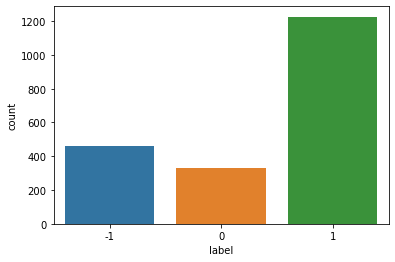

In [48]:
sns.countplot(x=df["label"])

+ This might represent a case of ***imbalanced dataset***. We will come to this later. 

/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Standard Value', ylabel='Density'>

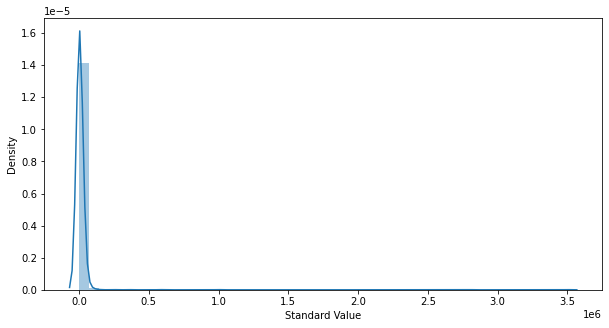

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(df["Standard Value"])

+ Molecules show a highly variable IC50. To be able to compare easily, we will calculate pIC50 values instead.

In [50]:
import math

In [51]:
df["pIC50"] = [9 - math.log10(x) for x in df["Standard Value"]]

In [52]:
df.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units,"(Standard Value, mean)","(Standard Value, std)",new_value,label,pIC50
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000,85700.0,0,4.067019
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',1.2,nM,2.0,1.131371,2.0,1,8.920819
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,'=',960.0,nM,960.0,NaN,960.0,1,6.017729
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,'=',120.0,nM,120.0,NaN,120.0,1,6.920819
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,'=',840.0,nM,840.0,NaN,840.0,1,6.075721


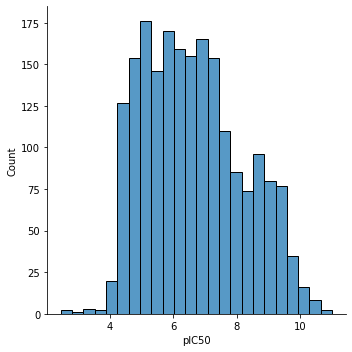

In [53]:
sns.displot(df["pIC50"])

In [54]:
df.shape

(2017, 11)

In [55]:
df.reset_index(drop=True,inplace=True)

In [56]:
df.head()

,Molecule ChEMBL ID,Smiles,#RO5 Violations,Standard Relation,Standard Value,Standard Units,"(Standard Value, mean)","(Standard Value, std)",new_value,label,pIC50
0,CHEMBL370039,O=C(Cc1cc2ccccc2o1)c1ccc(O)cc1O,0,'=',85700.0,nM,85700.0,0.000000,85700.0,0,4.067019
1,CHEMBL3774737,COC[C@H](C)CN1[C@H](c2c(F)cc(/C=C/C(=O)O)cc2F)...,0,'=',1.2,nM,2.0,1.131371,2.0,1,8.920819
2,CHEMBL3775116,CC(C)CN1[C@@H](c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)c...,0,'=',960.0,nM,960.0,NaN,960.0,1,6.017729
3,CHEMBL1597831,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCC(N(Cc2cc...,2,'=',120.0,nM,120.0,NaN,120.0,1,6.920819
4,CHEMBL1455849,O=C(CCCCCn1c(=S)[nH]c2ccccc2c1=O)N1CCN(c2cccc(...,0,'=',840.0,nM,840.0,NaN,840.0,1,6.075721


In [57]:
df = df[df["label"] != -1]

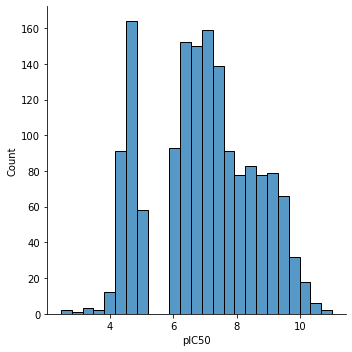

In [58]:
sns.displot(x=df["pIC50"])

In [59]:
df.columns

Index([      'Molecule ChEMBL ID',                   'Smiles',
                '#RO5 Violations',        'Standard Relation',
                 'Standard Value',           'Standard Units',
       ('Standard Value', 'mean'),  ('Standard Value', 'std'),
                      'new_value',                    'label',
                          'pIC50'],
      dtype='object')

In [60]:
df[['Molecule ChEMBL ID', 'Smiles', '#RO5 Violations','label', 'pIC50']].to_csv("dataset.csv",index=None,header=True
                                                                               ,sep="\t")